In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

df_train = pd.read_csv("dataset/df_train.csv")
df_test = pd.read_csv("dataset/df_test.csv")

In [2]:
df_train.head()
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15245 entries, 0 to 15244
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              15245 non-null  float64
 1   bedrooms           15245 non-null  int64  
 2   condition          15245 non-null  int64  
 3   grade              15245 non-null  int64  
 4   has_basement       15245 non-null  bool   
 5   living_in_m2       15245 non-null  float64
 6   was_renovated      15245 non-null  bool   
 7   perfect_condition  15245 non-null  bool   
 8   real_bathroom      15245 non-null  int64  
 9   has_lavatory       15245 non-null  bool   
 10  single_floor       15245 non-null  bool   
 11  month              15245 non-null  int64  
 12  quartile_zone_x    15245 non-null  int64  
 13  quartile_zone_y    15245 non-null  int64  
dtypes: bool(5), float64(2), int64(7)
memory usage: 1.1 MB
None


In [3]:
print(f"Train lines : {df_train.shape[0]}\n"
      f"Test lines : {df_test.shape[0]}")

Train lines : 15245
Test lines : 5082


In [4]:
x_train = df_train.drop(columns = ['price', 'quartile_zone_x', 'month', 'bedrooms', 'condition'] )
x_test = df_test.drop(columns = ['price', 'quartile_zone_x','month','bedrooms','condition'])

y_train = df_train['price']
y_test = df_test['price']
print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15245 entries, 0 to 15244
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grade              15245 non-null  int64  
 1   has_basement       15245 non-null  bool   
 2   living_in_m2       15245 non-null  float64
 3   was_renovated      15245 non-null  bool   
 4   perfect_condition  15245 non-null  bool   
 5   real_bathroom      15245 non-null  int64  
 6   has_lavatory       15245 non-null  bool   
 7   single_floor       15245 non-null  bool   
 8   quartile_zone_y    15245 non-null  int64  
dtypes: bool(5), float64(1), int64(3)
memory usage: 551.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   grade              5082 non-null   int64  
 1   has_basement       5082 non-null   bool   


In [5]:
scaler = StandardScaler()
scaler.fit(x_train)

X_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
X_train.set_index(x_train.index, inplace=True)

X_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
X_test.set_index(x_test.index, inplace=True)

print(X_train)

          grade  has_basement  living_in_m2  was_renovated  perfect_condition  \
0      0.172301     -0.779496      0.848782      -0.196543          -0.293884   
1      0.766988      1.282881     -0.914884      -0.196543          -0.293884   
2     -0.422386      1.282881     -0.395355      -0.196543          -0.293884   
3     -1.017073     -0.779496     -1.584804      -0.196543          -0.293884   
4     -0.422386      1.282881     -0.860197      -0.196543          -0.293884   
...         ...           ...           ...            ...                ...   
15240 -0.422386     -0.779496     -1.270352      -0.196543           3.402702   
15241 -0.422386      1.282881     -0.422699      -0.196543          -0.293884   
15242  0.172301     -0.779496     -0.573089      -0.196543          -0.293884   
15243  0.172301     -0.779496     -0.545745      -0.196543          -0.293884   
15244 -0.422386     -0.779496     -1.598476       5.087939          -0.293884   

       real_bathroom  has_l

In [67]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     4345.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:30:38   Log-Likelihood:            -1.9858e+05
No. Observations:               15245   AIC:                         3.972e+05
Df Residuals:                   15235   BIC:                         3.973e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.739e+05    890.24

In [7]:
variance_infl_factor = pd.DataFrame({'feature':X_train.columns})
variance_infl_factor['VIF'] =  [variance_inflation_factor((X_train).values, i) for i in range(X_train.shape[1])]
variance_infl_factor.sort_values(by = 'VIF', ascending=False)

print(variance_infl_factor)

             feature       VIF
0              grade  1.741938
1       has_basement  1.289434
2       living_in_m2  2.454554
3      was_renovated  1.008469
4  perfect_condition  1.022994
5      real_bathroom  1.836878
6       has_lavatory  1.284152
7       single_floor  1.585759
8    quartile_zone_y  1.101710


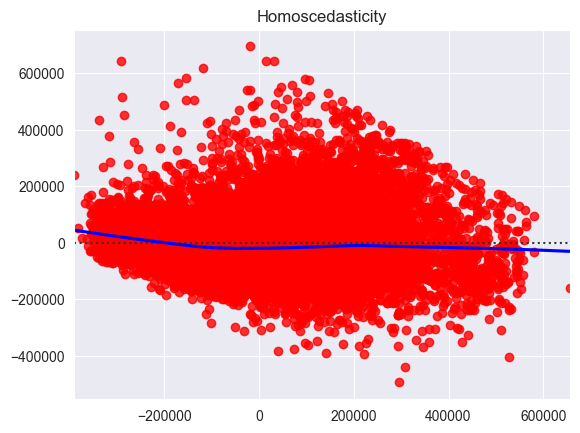

In [8]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color='red', line_kws={'color': 'blue'})
plt.title('Homoscedasticity')
plt.show()

In [9]:
model.resid.mean()

473890.3492292555

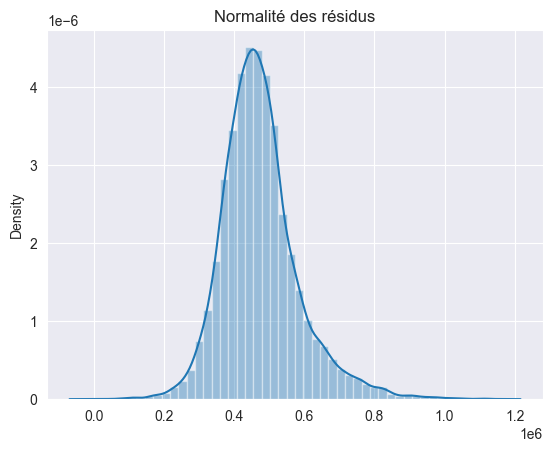

In [10]:
sns.distplot(model.resid,kde=True)
plt.title('Normalité des résidus')
plt.show()

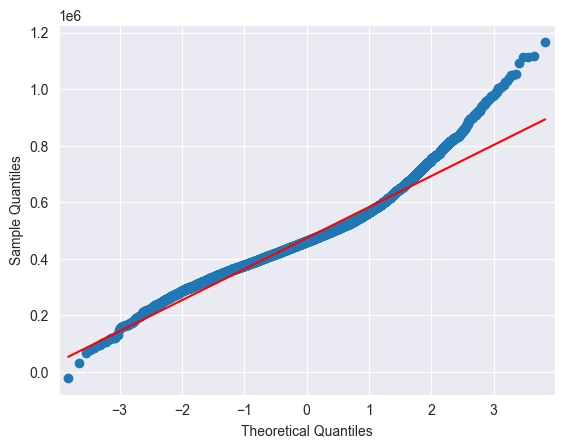

In [11]:
sm.ProbPlot(model.resid).qqplot(line='s');

In [73]:
y_pred = model.predict(sm.add_constant(X_test))

print(f'R² score: {r2_score(y_test, y_pred)*100}')

print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

print("MAE:",mean_absolute_error(y_test, y_pred))

print("MAPE:",np.mean(np.abs( (y_test-y_pred) / y_test))*100)


R² score: 72.18180886941548
RMSE: 109638.6341799119
MAE: 81399.1211215976
MAPE: 18.239545910954057
